In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
risultati = np.load("Results/KNN_95.npz", allow_pickle = True)

In [3]:
for k in risultati.keys():
    comando = f"{k} = risultati['{k}']"
    print(f"Sto per runnare \t --> {comando}")    
    exec(comando)

Sto per runnare 	 --> globConfusionMatrix = risultati['globConfusionMatrix']
Sto per runnare 	 --> globAccuracy = risultati['globAccuracy']
Sto per runnare 	 --> globPrecision = risultati['globPrecision']
Sto per runnare 	 --> globRecall = risultati['globRecall']
Sto per runnare 	 --> globF1 = risultati['globF1']
Sto per runnare 	 --> globxROC = risultati['globxROC']
Sto per runnare 	 --> globyROC = risultati['globyROC']
Sto per runnare 	 --> globAUC = risultati['globAUC']
Sto per runnare 	 --> globConfusionMatrixErr = risultati['globConfusionMatrixErr']
Sto per runnare 	 --> globAccuracyErr = risultati['globAccuracyErr']
Sto per runnare 	 --> globPrecisionErr = risultati['globPrecisionErr']
Sto per runnare 	 --> globRecallErr = risultati['globRecallErr']
Sto per runnare 	 --> globF1Err = risultati['globF1Err']
Sto per runnare 	 --> globxROCErr = risultati['globxROCErr']
Sto per runnare 	 --> globyROCErr = risultati['globyROCErr']
Sto per runnare 	 --> globAUCErr = risultati['globAUCEr

In [4]:
bestCase = np.argmax(globAccuracy)
bestCase = np.argmax(globAUC)
print(f"Massimo di globAccuracy: {np.max(globAccuracy)} -- Indice: {np.argmax(globAccuracy)}")
print(f"Massimo di globAUC : {np.max(globAUC )} -- Indice: {np.argmax(globAUC )}")

print(f"Massimo di globPrecision : {np.max(globPrecision )} -- Indice: {np.argmax(globPrecision )}")
print(f"Massimo di globRecall : {np.max(globRecall )} -- Indice: {np.argmax(globRecall )}")
print(f"Massimo di globF1 : {np.max(globF1 )} -- Indice: {np.argmax(globF1 )}")

print(f"\n\nConfigurazione di iper parametri")
print(f"\item iperParam_n_neighbors: {iperParam_n_neighbors[bestCase]}".replace("iperParam_", ""))
print(f"\item iperParam_weights: {iperParam_weights[bestCase]}".replace("iperParam_", ""))
print(f"\item iperParam_algorithm: {iperParam_algorithm[bestCase]}".replace("iperParam_", ""))
print(f"\item iperParam_leaf_size: {iperParam_leaf_size[bestCase]}".replace("iperParam_", ""))

print(f"\n\nIndicatori best case")
print(f"Accuracy \t & {globAccuracy[bestCase]:.2f} \\\\")
print(f"Precision  \t & {globPrecision[bestCase]:.2f} \\\\")
print(f"Recall  \t & {globRecall[bestCase]:.2f} \\\\")
print(f"F1  \t\t & {globF1[bestCase]:.2f} \\\\")

print(f"AUC \t\t & {globAUC[bestCase]:.2f} \\\\")


Massimo di globAccuracy: 0.9305203888930558 -- Indice: 8
Massimo di globAUC : 0.9769792592465564 -- Indice: 13
Massimo di globPrecision : 0.8791521215698545 -- Indice: 2
Massimo di globRecall : 0.904215204159516 -- Indice: 7
Massimo di globF1 : 0.8798742264597348 -- Indice: 9


Configurazione di iper parametri
\item n_neighbors: 50
\item weights: distance
\item algorithm: ball_tree
\item leaf_size: 5


Indicatori best case
Accuracy 	 & 0.93 \\
Precision  	 & 0.86 \\
Recall  	 & 0.90 \\
F1  		 & 0.88 \\
AUC 		 & 0.98 \\


In [5]:
print(f"AUC Con parametri ipotizzati  {np.max(globAUC[(iperParam_n_neighbors <= 25)] ):.2f}")

AUC Con parametri ipotizzati  0.98


# Best case
## ROC Curve

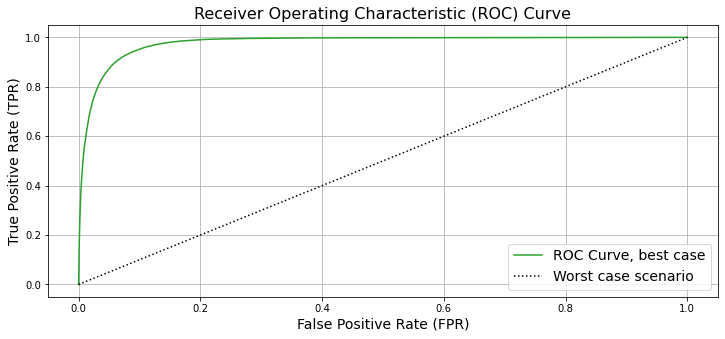

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

ax.plot(globxROC[:,bestCase], globyROC[:,bestCase], label = "ROC Curve, best case", c = "tab:green")

ax.plot(np.array((0,1)), np.array((0,1)), c = "k", ls = ":", label = "Worst case scenario")

ax.grid()
ax.legend(fontsize = 14)

ax.set_title("Receiver Operating Characteristic (ROC) Curve", fontsize = 16)

ax.set_xlabel("False Positive Rate (FPR)", fontsize = 14)
ax.set_ylabel("True Positive Rate (TPR)", fontsize = 14)

fig.savefig("../LATEX/FIGURE/31-roc.pdf", format = "pdf", bbox_inches = "tight")

plt.show()

## Confusion matrix

In [7]:
globConfusionMatrix.shape

(2, 2, 168)

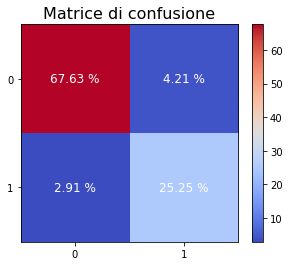

In [8]:
myConfMat = globConfusionMatrix[:,:,bestCase]
myConfMat /= np.sum(myConfMat)
myConfMat *= 100


fig, ax = plt.subplots()
fig.set_size_inches(5,4)

# Plotto la matrice di covarianza
im = ax.imshow(myConfMat, cmap = "coolwarm", origin = "upper")

ax.set_title(f"Matrice di confusione", fontsize = 16)

# Stampo i valori sulle celle
for i in range(myConfMat.shape[0]):
    for j in range(myConfMat.shape[1]):
        text = ax.text(j, i, f"{myConfMat[i, j]:.2f} %",
                       ha="center", va="center", color="w", fontsize = "large")#weight="semibold")
        
ax.set_xticks((0,1))
ax.set_yticks((0,1))


# Disegno la colorbar
fig.colorbar(im)

fig.savefig("../LATEX/FIGURE/31-conf-matrix.pdf", format = "pdf", bbox_inches = "tight")

plt.show()

# Fisso 3 parametri del caso migliore, e guardo la dipendenza dal quarto

In [9]:
# Ingrandisco label per plot relazione
import matplotlib as mpl
label_size = 24
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

In [10]:
optsAcc = {"marker":"*", "ls":":", "c":"tab:green"}
optsAUC = {"marker":"^", "ls":":", "c":"tab:red"}
optsPre = {"marker":"s", "ls":":", "c":"tab:blue"}
optsRec = {"marker":"v", "ls":":", "c":"tab:orange"}

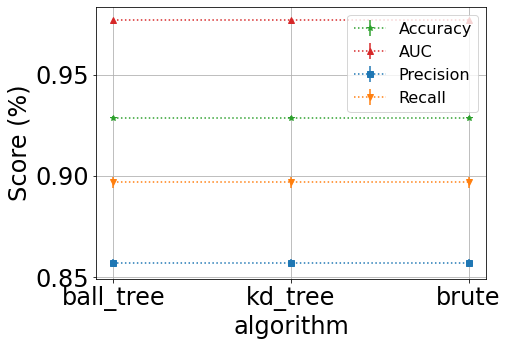

In [11]:
cond = (iperParam_n_neighbors == iperParam_n_neighbors[bestCase]) & (iperParam_weights == iperParam_weights[bestCase]) & (iperParam_leaf_size == iperParam_leaf_size[bestCase])

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

#ax.errorbar([0,1,2], y = globAccuracy[cond], yerr = globAccuracyErr[cond], label = "Accuracy", **opts)
ax.errorbar([0,1,2], globAccuracy[cond], yerr = globAccuracyErr[cond], label = "Accuracy", **optsAcc)
ax.errorbar([0,1,2], globAUC[cond], yerr = globAUCErr[cond], label = "AUC", **optsAUC)
ax.errorbar([0,1,2], globPrecision[cond], yerr = globPrecisionErr[cond], label = "Precision", **optsPre)
ax.errorbar([0,1,2], globRecall[cond], yerr = globRecallErr[cond], label = "Recall", **optsRec)


ax.set_xlabel("algorithm", fontsize = 24)
ax.set_ylabel("Score (%)", fontsize = 24)

ax.set_xticks((0,1,2))
ax.set_xticklabels(iperParam_algorithm[cond])


ax.grid()
ax.legend(fontsize = 16)

fig.savefig("../LATEX/FIGURE/31-scan-1.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

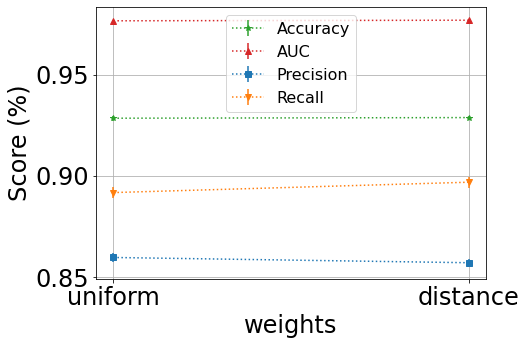

In [12]:
cond = (iperParam_n_neighbors == iperParam_n_neighbors[bestCase]) & (iperParam_algorithm == iperParam_algorithm[bestCase]) & (iperParam_leaf_size == iperParam_leaf_size[bestCase])

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

#ax.errorbar([0,1,2], y = globAccuracy[cond], yerr = globAccuracyErr[cond], label = "Accuracy", **opts)
ax.errorbar([0,1,], globAccuracy[cond], yerr = globAccuracyErr[cond], label = "Accuracy", **optsAcc)
ax.errorbar([0,1,], globAUC[cond], yerr = globAUCErr[cond], label = "AUC", **optsAUC)
ax.errorbar([0,1,], globPrecision[cond], yerr = globPrecisionErr[cond], label = "Precision", **optsPre)
ax.errorbar([0,1,], globRecall[cond], yerr = globRecallErr[cond], label = "Recall", **optsRec)


ax.set_xlabel("weights", fontsize = 24)
ax.set_ylabel("Score (%)", fontsize = 24)

ax.set_xticks((0,1))
ax.set_xticklabels(iperParam_weights[cond])


ax.grid()
ax.legend(fontsize = 16)

fig.savefig("../LATEX/FIGURE/31-scan-2.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

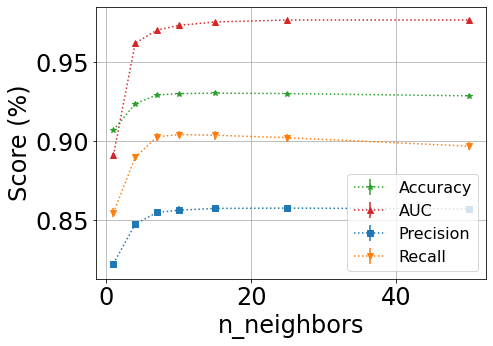

In [13]:
cond = (iperParam_algorithm == iperParam_algorithm[bestCase]) & (iperParam_weights == iperParam_weights[bestCase]) & (iperParam_leaf_size == iperParam_leaf_size[bestCase])

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

#ax.errorbar([0,1,2], y = globAccuracy[cond], yerr = globAccuracyErr[cond], label = "Accuracy", **opts)
ax.errorbar(iperParam_n_neighbors[cond], globAccuracy[cond], yerr = globAccuracyErr[cond], label = "Accuracy", **optsAcc)
ax.errorbar(iperParam_n_neighbors[cond], globAUC[cond], yerr = globAUCErr[cond], label = "AUC", **optsAUC)
ax.errorbar(iperParam_n_neighbors[cond], globPrecision[cond], yerr = globPrecisionErr[cond], label = "Precision", **optsPre)
ax.errorbar(iperParam_n_neighbors[cond], globRecall[cond], yerr = globRecallErr[cond], label = "Recall", **optsRec)


ax.set_xlabel("n_neighbors", fontsize = 24)
ax.set_ylabel("Score (%)", fontsize = 24)


ax.grid()
ax.legend(fontsize = 16)

fig.savefig("../LATEX/FIGURE/31-scan-3.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

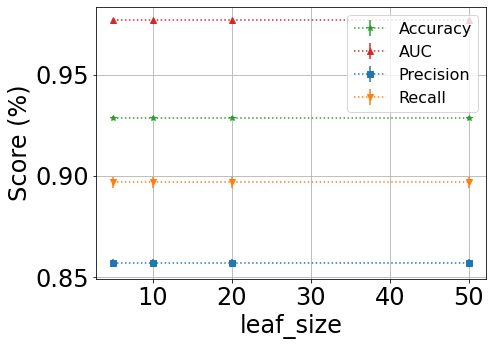

In [14]:
cond = (iperParam_algorithm == iperParam_algorithm[bestCase]) & (iperParam_weights == iperParam_weights[bestCase]) & (iperParam_n_neighbors == iperParam_n_neighbors[bestCase])

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

#ax.errorbar([0,1,2], y = globAccuracy[cond], yerr = globAccuracyErr[cond], label = "Accuracy", **opts)
ax.errorbar(iperParam_leaf_size[cond], globAccuracy[cond], yerr = globAccuracyErr[cond], label = "Accuracy", **optsAcc)
ax.errorbar(iperParam_leaf_size[cond], globAUC[cond], yerr = globAUCErr[cond], label = "AUC", **optsAUC)
ax.errorbar(iperParam_leaf_size[cond], globPrecision[cond], yerr = globPrecisionErr[cond], label = "Precision", **optsPre)
ax.errorbar(iperParam_leaf_size[cond], globRecall[cond], yerr = globRecallErr[cond], label = "Recall", **optsRec)


ax.set_xlabel("leaf_size", fontsize = 24)
ax.set_ylabel("Score (%)", fontsize = 24)


ax.grid()
ax.legend(fontsize = 16)

fig.savefig("../LATEX/FIGURE/31-scan-4.pdf", format = "pdf", bbox_inches = "tight")
plt.show()